<a href="https://colab.research.google.com/github/Manoj250/Hand-sketch-recognition-with-deep-learning-google-quickdraw-/blob/main/finalMinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir data_sets

Downloading the files using urlretrieve

In [ ]:
import pandas as pd
from urllib.request import urlretrieve
import numpy as np
import os

df = pd.read_csv("loaded_catagories.csv")
ndjson_file_names = df["catagories"].tolist()
download_link = "https://storage.googleapis.com/quickdraw_dataset/full/simplified/"

for file_name in ndjson_file_names:
  name = "%20".join(file_name.split(' '))
  print(download_link+name)
  urlretrieve(download_link+name,"data_sets/"+file_name)


https://storage.googleapis.com/quickdraw_dataset/full/simplified/skull.ndjson
https://storage.googleapis.com/quickdraw_dataset/full/simplified/candle.ndjson
https://storage.googleapis.com/quickdraw_dataset/full/simplified/fish.ndjson
https://storage.googleapis.com/quickdraw_dataset/full/simplified/zigzag.ndjson
https://storage.googleapis.com/quickdraw_dataset/full/simplified/light%20bulb.ndjson
https://storage.googleapis.com/quickdraw_dataset/full/simplified/hammer.ndjson
https://storage.googleapis.com/quickdraw_dataset/full/simplified/cup.ndjson
https://storage.googleapis.com/quickdraw_dataset/full/simplified/axe.ndjson
https://storage.googleapis.com/quickdraw_dataset/full/simplified/pants.ndjson
https://storage.googleapis.com/quickdraw_dataset/full/simplified/eye.ndjson
https://storage.googleapis.com/quickdraw_dataset/full/simplified/apple.ndjson
https://storage.googleapis.com/quickdraw_dataset/full/simplified/tree.ndjson
https://storage.googleapis.com/quickdraw_dataset/full/simplifi

ndjson package is required to read ndjson files

In [ ]:
!pip install ndjson -q

Stroring all the x,y coordinates in x_unrefined[] and corresponding labels in y[]

In [ ]:
import ndjson
import numpy as np

x_unrefined = []
y = []

index = 0
sub_index = 0
for file_name in ndjson_file_names:
  with open("data_sets/"+file_name) as f:
    data = ndjson.load(f)
  for item in data:
    if(sub_index > 10000):
      sub_index = 0
      break
    if(item["recognized"] == True):
      x_unrefined.append(item["drawing"])
      sub_index = sub_index + 1
      y.append(index)

  index = index + 1

converting co-ordinates to images

In [ ]:
import itertools
from PIL import Image, ImageDraw
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt



x = []

for arr in x_unrefined:
  w, h = 256, 256
  img = Image.new("RGB", (w, h))
  img1 = ImageDraw.Draw(img)  
  i = 1
  for stroke in arr:
    for (a,b) in zip(stroke[0],stroke[1]):
      try:
        shape = [(a,b), (stroke[0][i],stroke[1][i])]
        img1.line(shape, fill ="white", width = 15)
        i = i+1
      except:
        pass
    i = 1

  img = np.asarray(img)
  rowAverage = np.average(img,axis=1)
  colAverage = np.average(img,axis=0)
  deletedBlankCols = np.delete(img,[np.where(colAverage==0.)[0]],axis=1) 
  deletedBlankRows = np.delete(deletedBlankCols,[np.where(rowAverage==0.)[0]],axis=0)
  img = Image.fromarray(deletedBlankRows)
  img = cv2.resize(np.asarray(img), (28,28), interpolation= cv2.INTER_AREA)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = img.astype("float32")
  img = img/255.
  img = img.reshape(28,28,1)
  x.append(img)

# **Lets see whats happening above**

In [ ]:
example = x_unrefined[10000] #just for example

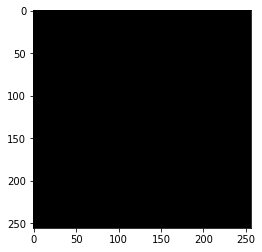

In [ ]:
w, h = 256, 256
img = Image.new("RGB", (w, h)) #creating a image to draw on
img1 = ImageDraw.Draw(img)
plt.imshow(img)

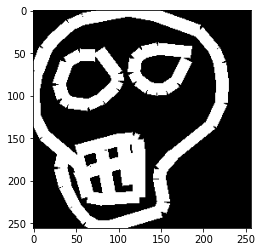

In [ ]:
for stroke in example:
    for (a,b) in zip(stroke[0],stroke[1]):            #draw all the strokes
      try:
        shape = [(a,b), (stroke[0][i],stroke[1][i])]
        img1.line(shape, fill ="white", width = 15)
        i = i+1
      except:
        pass
    i = 1
img = np.asarray(img)
plt.imshow(img)

In [ ]:
rowAverage = np.average(img,axis=1) #finding row and column average
colAverage = np.average(img,axis=0)

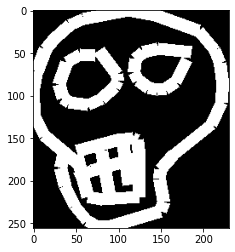

In [ ]:
deletedBlankCols = np.delete(img,[np.where(colAverage==0.)[0]],axis=1) #deleting columns without any drawing
plt.imshow(deletedBlankCols)

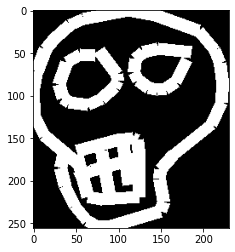

In [ ]:
deletedBlankRows = np.delete(deletedBlankCols,[np.where(rowAverage==0.)[0]],axis=0) #deleting rows 
plt.imshow(deletedBlankRows)

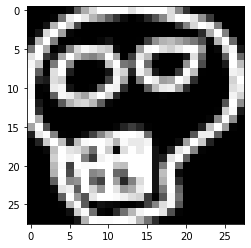

In [ ]:
img = Image.fromarray(deletedBlankRows)
img = cv2.resize(np.asarray(img), (28,28), interpolation= cv2.INTER_AREA) #resizing to 28,28 using open cv
plt.imshow(img)

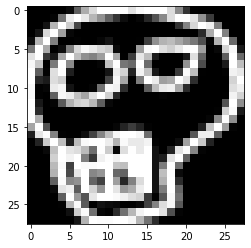

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converting 28,28,3 to 28,28,1
plt.imshow(img,cmap="gray")

float32
max and min before normalizing are ( 255.0 , 0.0 )
max and min after normalizing are ( 1.0 , 0.0 )
final shape of the image is (28, 28, 1)


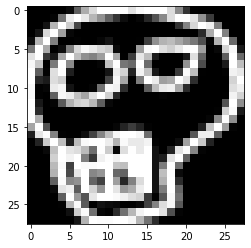

In [ ]:
img = img.astype("float32")
print(img.dtype)
print("max and min before normalizing are","(",np.max(img),",",np.min(img),")")
img = img/255.
print("max and min after normalizing are","(",np.max(img),",",np.min(img),")")
img = img.reshape(28,28,1)
print("final shape of the image is",img.shape)
plt.imshow(img.squeeze(),cmap="gray")

In [ ]:
print(np.array(x).shape,np.array(y).shape)

(200020, 28, 28, 1) (200020,)


In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

y = to_categorical(y)
x_train , x_test , y_train , y_test = train_test_split(x, y, train_size=0.70,test_size=0.30, random_state=4)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(140014, 28, 28, 1) (60006, 28, 28, 1) (140014, 20) (60006, 20)


In [ ]:
!pip install keras-tuner -q

     |████████████████████████████████| 98 kB 4.1 MB/s 


In [ ]:
!mkdir models

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D #to extract features
from keras.layers import MaxPooling2D #to reduce dimension and supress noise and also to make edges distinct
from keras.layers import Dense #classic fully connected layers to make classification
from keras.layers import Flatten #to convert multidimensional tensors to single dimension
from keras.layers.core import Dropout #to prevent overfitting
from keras_tuner import RandomSearch
from keras.callbacks import EarlyStopping
from tensorflow import keras

est = EarlyStopping(monitor='val_accuracy', mode = "max" , patience=3)

def builder(hp):
  model = Sequential()
  stride = hp.Choice("stride", [1,2,3])
  model.add(Conv2D(hp.Int("first_layer", min_value=10, max_value=50, step=10), (stride, stride), activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(hp.Int("second_layer", min_value=30, max_value=100, step=20), (stride, stride), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(hp.Int("third_layer", min_value=60, max_value=150, step=30), (stride, stride), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(hp.Choice("dropout", [0.1,0.2,0.3])))
  model.add(Flatten())
  model.add(Dense(1000, activation='relu'))
  model.add(Dense(1000, activation='relu'))
  model.add(Dense(20, activation='softmax'))
  opt = keras.optimizers.Adam(learning_rate=hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4]))
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
tuner = RandomSearch(
    builder,
    objective="accuracy",
    max_trials=100,
    executions_per_trial=1,
    overwrite=True,
    directory="models",
    project_name="quickdraw",
)

tuner.search(x_train[0:2000], y_train[0:2000], epochs=1, validation_data=(x_test[0:200], y_test[0:200]))


Trial 100 Complete [00h 00m 07s]
accuracy: 0.08349999785423279

Best accuracy So Far: 0.24050000309944153
Total elapsed time: 00h 09m 36s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in models/quickdraw
Showing 10 best trials
Objective(name='accuracy', direction='max')
Trial summary
Hyperparameters:
stride: 2
first_layer: 30
second_layer: 90
third_layer: 120
dropout: 0.1
learning_rate: 0.001
Score: 0.24050000309944153
Trial summary
Hyperparameters:
stride: 2
first_layer: 40
second_layer: 90
third_layer: 120
dropout: 0.1
learning_rate: 0.001
Score: 0.23549999296665192
Trial summary
Hyperparameters:
stride: 2
first_layer: 30
second_layer: 30
third_layer: 90
dropout: 0.2
learning_rate: 0.001
Score: 0.2304999977350235
Trial summary
Hyperparameters:
stride: 2
first_layer: 30
second_layer: 70
third_layer: 60
dropout: 0.1
learning_rate: 0.001
Score: 0.23000000417232513
Trial summary
Hyperparameters:
stride: 2
first_layer: 10
second_layer: 70
third_layer: 150
dropout: 0.2
learning_rate: 0.001
Score: 0.2280000001192093
Trial summary
Hyperparameters:
stride: 2
first_layer: 20
second_layer: 70
third_layer: 120
dropout: 0.2
learning_rate: 0.001
Score: 0

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

In [ ]:
print(best_hps)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 27, 27, 30)        150       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 30)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 90)        10890     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 90)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 120)         43320     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 120)       

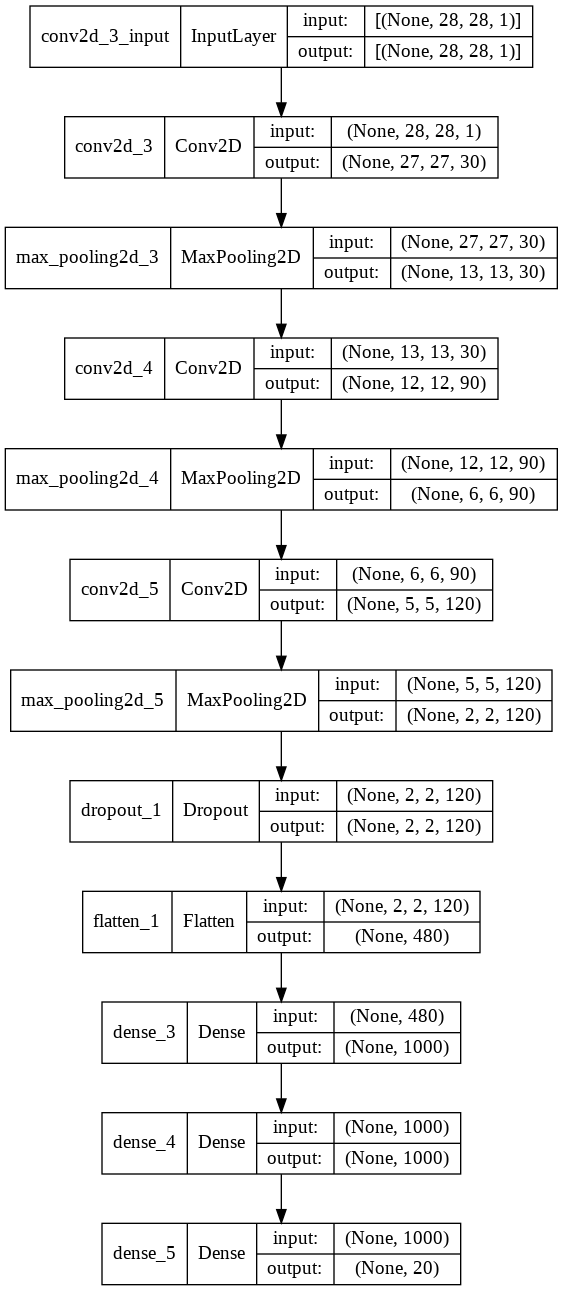

In [ ]:
from tensorflow.keras.utils import plot_model as plotter
plotter(model, to_file="arch.png", show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras

     |████████████████████████████████| 795 kB 7.0 MB/s 


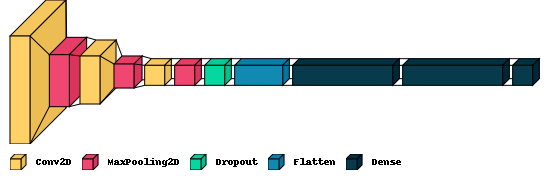

In [ ]:
import visualkeras

visualkeras.layered_view(model,legend=True)

In [ ]:
history = model.fit(x_train,y_train ,epochs = 10 ,verbose=1,validation_data=(x_test,y_test),callbacks=[est])

Epoch 1/10
4376/4376 [==============================] - 215s 49ms/step - loss: 0.6180 - accuracy: 0.8126 - val_loss: 0.3936 - val_accuracy: 0.8797
Epoch 2/10
4376/4376 [==============================] - 210s 48ms/step - loss: 0.3582 - accuracy: 0.8896 - val_loss: 0.3316 - val_accuracy: 0.8989
Epoch 3/10
4376/4376 [==============================] - 209s 48ms/step - loss: 0.2913 - accuracy: 0.9088 - val_loss: 0.3104 - val_accuracy: 0.9054
Epoch 4/10
4376/4376 [==============================] - 212s 49ms/step - loss: 0.2473 - accuracy: 0.9217 - val_loss: 0.3014 - val_accuracy: 0.9087
Epoch 5/10
4376/4376 [==============================] - 209s 48ms/step - loss: 0.2144 - accuracy: 0.9301 - val_loss: 0.2852 - val_accuracy: 0.9143
Epoch 6/10
4376/4376 [==============================] - 210s 48ms/step - loss: 0.1873 - accuracy: 0.9380 - val_loss: 0.2998 - val_accuracy: 0.9140
Epoch 7/10
4376/4376 [==============================] - 211s 48ms/step - loss: 0.1662 - accuracy: 0.9453 - val_loss: 0

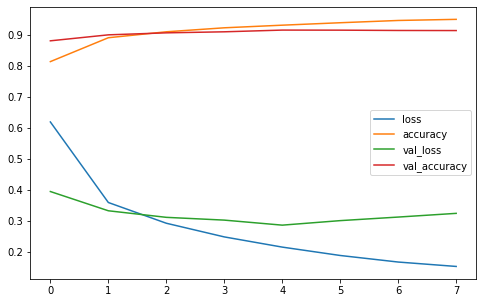

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))

cup


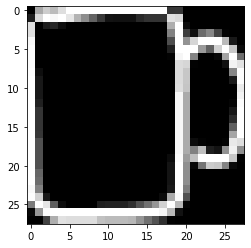

In [ ]:
import random

subject = x_test[random.randint(0,x_test.shape[0])]
result = model.predict(np.expand_dims(subject,axis=0))
plt.imshow(subject.squeeze(),cmap="gray")
index = np.argmax(result[0])
print(ndjson_file_names[index].split(".")[0])

In [ ]:
model.save("20samples2.h5")

(28, 28, 1)


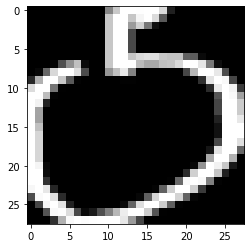

In [ ]:
img = x_test[9000]
img_tensor = np.expand_dims(img, axis = 0)
print(img.shape)
plt.imshow(img.squeeze(),cmap="gray")

In [ ]:
from keras.models import Model

layer_outputs = [layer.output for layer in model.layers[:6]]
activation_model = Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)

In [ ]:
activations[0].shape

(1, 27, 27, 30)

In [ ]:
def plot(acti,rows,columns):
  fig = plt.figure(figsize=(10, 10))
  for i in range(1, columns*rows+1):
      img = acti[0, :, :, i-1]
      fig.add_subplot(rows, columns, i)
      plt.imshow(img,cmap="gray")
  plt.show()

first convolution all feature maps


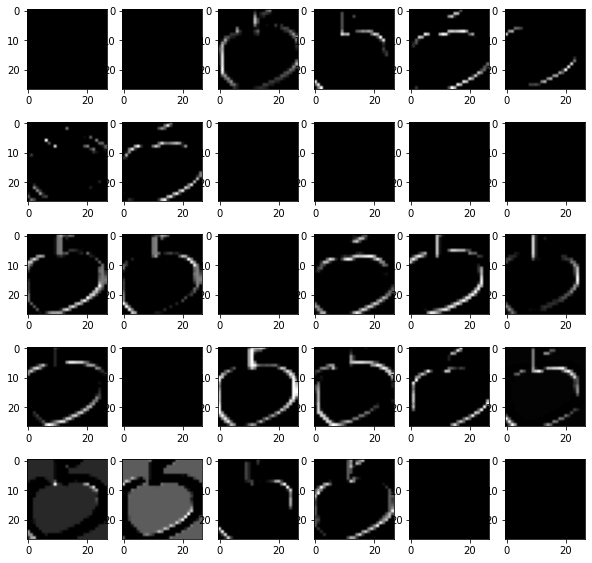

In [ ]:
print("first convolution all feature maps")
plot(activations[0],5,6)

first maxpool all feature maps


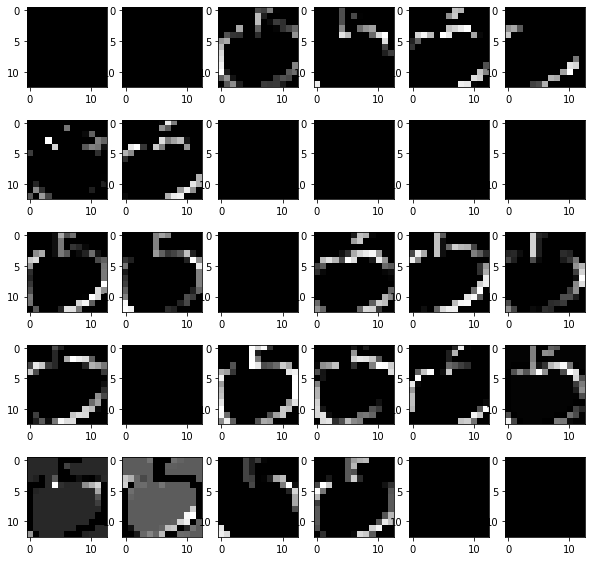

In [ ]:
print("first maxpool all feature maps")
plot(activations[1],5,6)

second convolution all feature maps


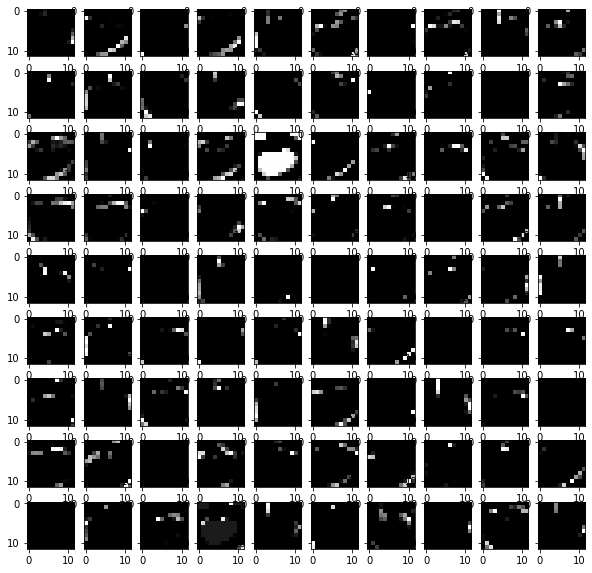

In [ ]:
print("second convolution all feature maps")
plot(activations[2],9,10)

second maxpool all feature maps


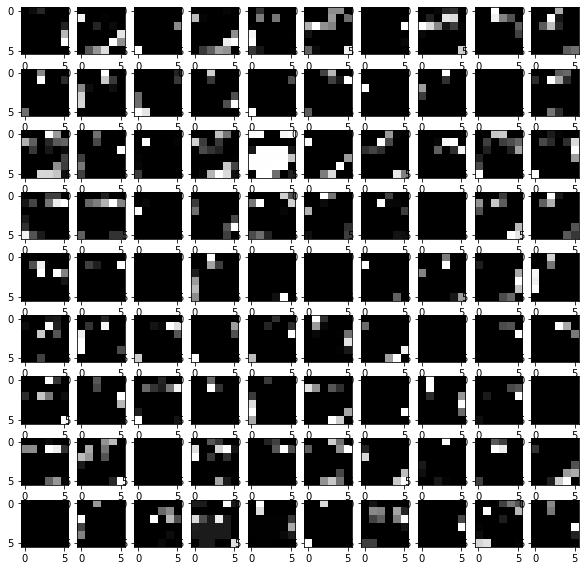

In [ ]:
print("second maxpool all feature maps")
plot(activations[3],9,10)

third convolution all feature maps


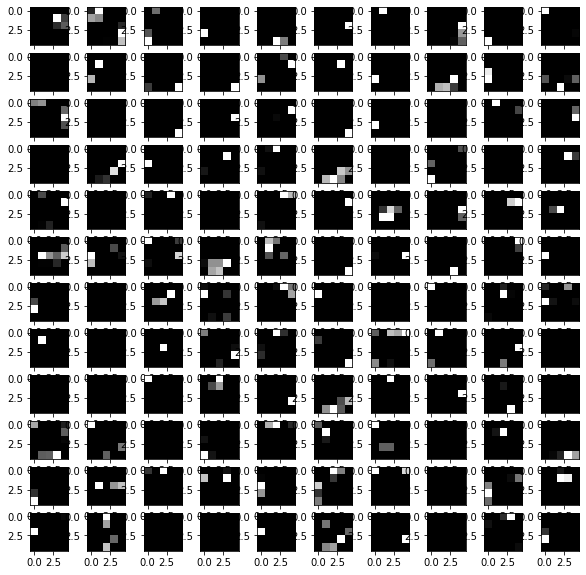

In [ ]:
print("third convolution all feature maps")
plot(activations[4],12,10)

third maxpool all feature maps


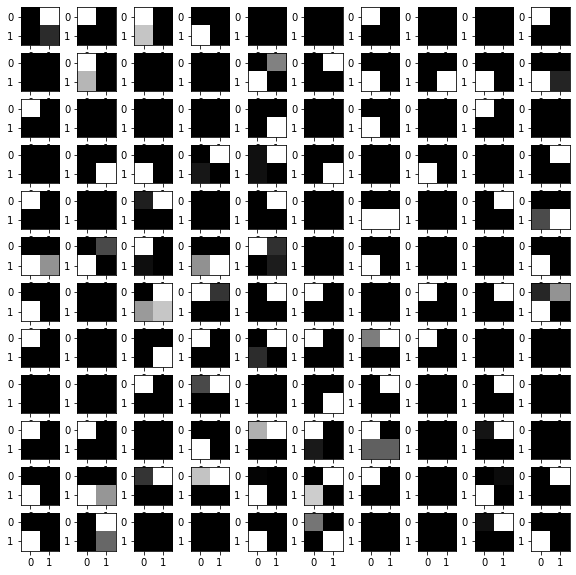

In [ ]:
print("third maxpool all feature maps")
plot(activations[5],12,10)